In [ ]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from mne.time_frequency import psd_array_multitaper

In [ ]:
#import os
#directory = '/content/drive/MyDrive/Colab_Notebooks/Data/40/'

# List all files and directories in the specified path
#all_files = os.listdir(directory)

# Filter to show only files (optional)
#only_files = [f for f in all_files if os.path.isfile(os.path.join(directory, f))]

# Print the list of files
#for file in only_files:
  #  print(file)

In [ ]:
def load_mat_trace_data(file_path):
    mat_data = scipy.io.loadmat(file_path)

    # Extract all trace keys from the .mat file
    trace_keys = [key for key in mat_data.keys() if not key.startswith('__')]

    if len(trace_keys) < 2:
        raise ValueError("The .mat file does not contain enough traces to determine voltage and current.")

    # Assuming the first trace is voltage and the second trace is current
    voltage_key = trace_keys[0]
    current_key = trace_keys[1]

    trace_data_v = mat_data[voltage_key]
    trace_data_a = mat_data[current_key]

    # Extract data
    voltage = trace_data_v[:, 1] * 1000  # Scale voltage by 1000 (mV)
    current = trace_data_a[:, 1]
    time_v = trace_data_v[:, 0]

    return time_v, voltage, current

def plot_voltage_over_time(time, voltage, title='Voltage over Time'):
    plt.figure(figsize=(12, 6))
    plt.plot(time, voltage, label='Voltage(mV)', color='blue')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_current_over_time(time, current, title='Current over Time'):
    plt.figure(figsize=(12, 6))
    plt.plot(time, current, label='Current', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Current (A)')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def compute_impedance_and_resonance(time, voltage, current,
                                    full_fmin=0.5, full_fmax=20.0,
                                    res_fmin=0, res_fmax=20):
    dt = time[1] - time[0]
    fs = 1.0 / dt
    print(f"Sampling rate: {fs:.2f} Hz")
    # Power spectral densities
    psd_v, freqs = psd_array_multitaper(voltage, sfreq=fs, fmin=full_fmin, fmax=full_fmax,
                                        adaptive=True, normalization='length')
    psd_i, _ = psd_array_multitaper(current, sfreq=fs, fmin=full_fmin, fmax=full_fmax,
                                    adaptive=True, normalization='length')
    # Impedance calculation
    impedance = np.sqrt(psd_v/psd_i)
    # Resonant frequency search
    idx_range = (freqs >= res_fmin) & (freqs <= res_fmax)
    freqs_range = freqs[idx_range]
    impedance_range = impedance[idx_range]
    resonant_freq = freqs_range[np.argmax(impedance_range)]
    print(f"Resonant frequency ({res_fmin}–{res_fmax} Hz): {resonant_freq:.2f} Hz")
    return freqs, impedance, resonant_freq, psd_v, psd_i

def compute_resonant_frequency_fft(time, voltage, current):
    dt = time[1] - time[0]
    fs = 1.0 / dt
    n = len(voltage)
    Vf = np.fft.rfft(voltage)
    If = np.fft.rfft(current)
    # 3. Corresponding frequency bins
    freqs = np.fft.rfftfreq(n, d=dt)
    Z = np.abs(Vf / If)
    valid = (freqs >= 0.5) & (freqs <= 20)
    freqs_valid = freqs[valid]
    Z_valid = Z[valid]
    res_idx = np.argmax(Z_valid)
    f_res = freqs_valid[res_idx]
    return f_res, freqs_valid, Z_valid



def plot_psds(freqs, psd_v, psd_i, voltage_label="Voltage PSD", current_label="Current PSD"):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(freqs, 10 * np.log10(psd_v), label=voltage_label)
    plt.title("Membrane Voltage PSD")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power (dB)")
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(freqs, 10 * np.log10(psd_i), label=current_label, color='orange')
    plt.title("Injected Current PSD")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power (dB)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_impedance_profile(freqs, impedance, resonant_freq,
                           full_fmin=0.5, full_fmax=20.0,
                           title="Multitaper Impedance Amplitude Profile"):
    plt.figure(figsize=(8, 5))
    plt.plot(freqs, impedance, label='Impedance Profile')

    plt.axvline(resonant_freq, color='r', linestyle='--',
                label=f'Resonant Frequency = {resonant_freq:.2f} Hz')
    plt.xlim(full_fmin, full_fmax)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Impedance")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [ ]:
Jul262024IR3a_time_v, Jul262024IR3a_voltage, Jul262024IR3a_current = load_mat_trace_data("/content/drive/MyDrive/Colab_Notebooks/Data/40/Jul292024IR3g.mat")


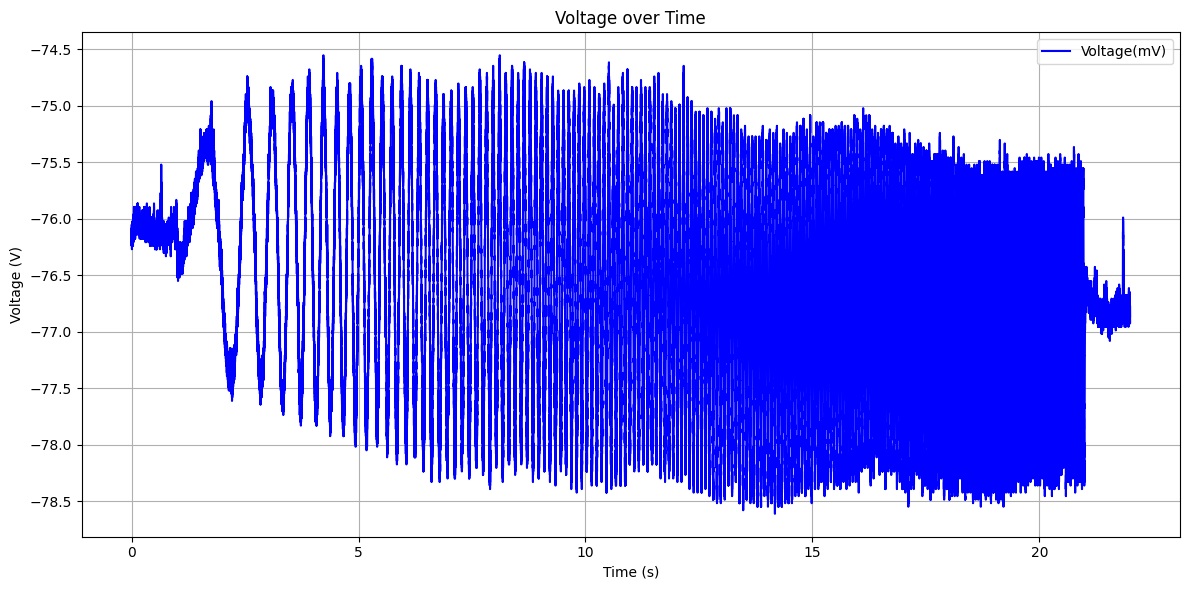

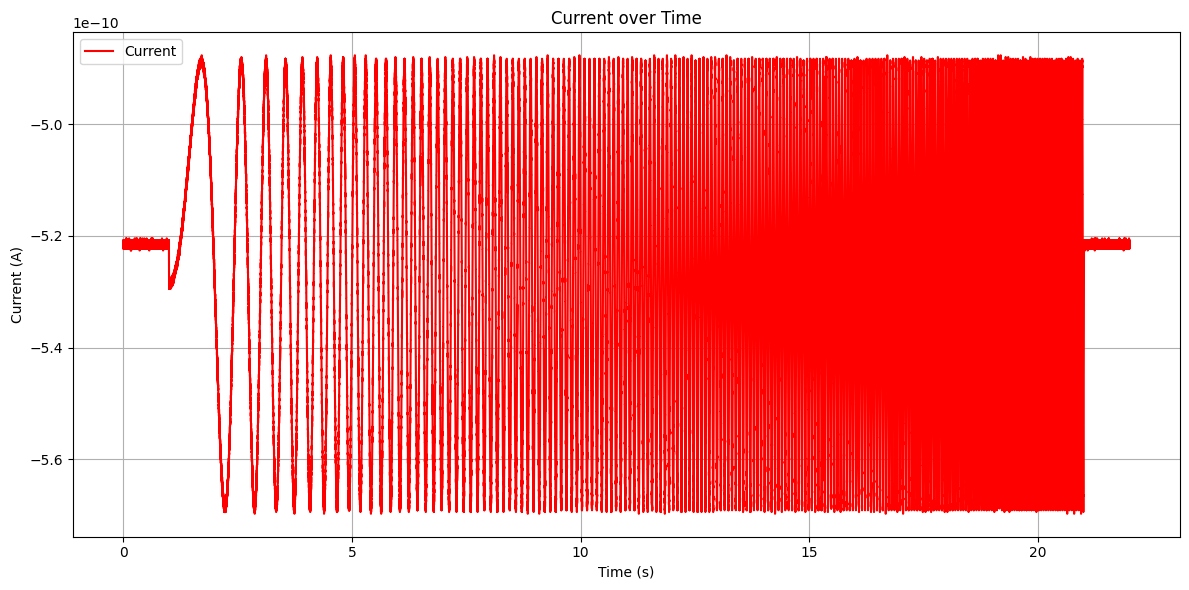

In [ ]:
plot_voltage_over_time(Jul262024IR3a_time_v, Jul262024IR3a_voltage)
plot_current_over_time(Jul262024IR3a_time_v, Jul262024IR3a_current)


In [ ]:
Jul262024IR3a_freqs, Jul262024IR3a_impedance, Jul262024IR3a_resonant_freq, Jul262024IR3a_psd_v, Jul262024IR3a_psd_i = compute_impedance_and_resonance(
    Jul262024IR3a_time_v, Jul262024IR3a_voltage, Jul262024IR3a_current)

Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 7.55 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


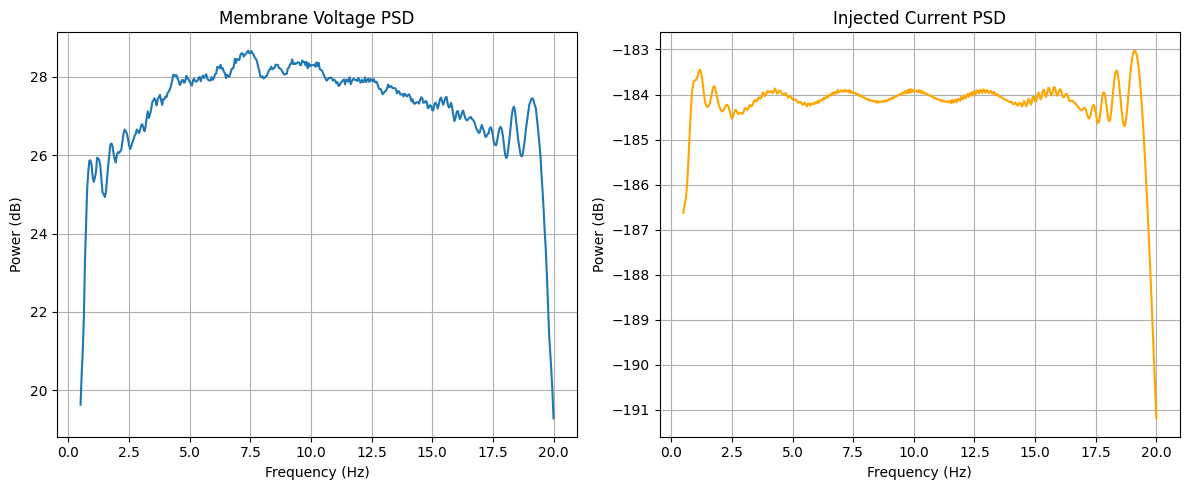

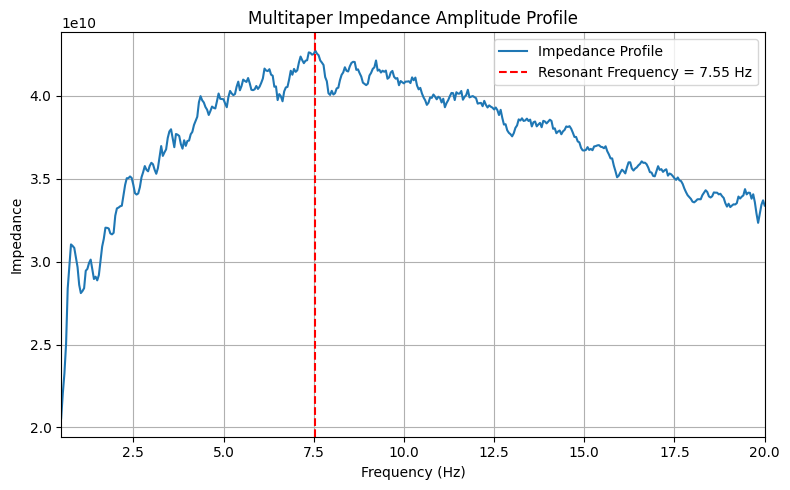

In [ ]:
plot_psds(Jul262024IR3a_freqs, Jul262024IR3a_psd_v, Jul262024IR3a_psd_i)
plot_impedance_profile(Jul262024IR3a_freqs, Jul262024IR3a_impedance, Jul262024IR3a_resonant_freq)


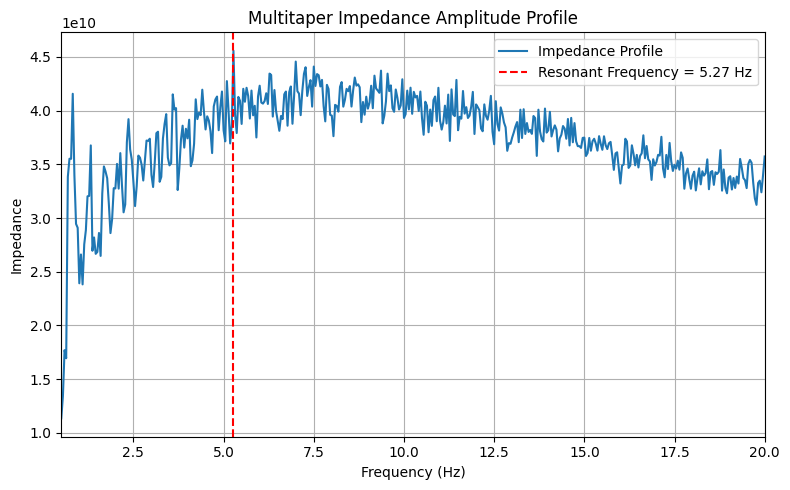

In [ ]:



# Example usage:
f_res, freqs, Z_profile = compute_resonant_frequency_fft(
    Jul262024IR3a_time_v,
    Jul262024IR3a_voltage,
    Jul262024IR3a_current
)
plot_impedance_profile(freqs, Z_profile, f_res)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from mne.time_frequency import psd_array_multitaper

# Define your functions here (include all the functions you already provided).

# Function to ensure a directory exists
def ensure_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Function to save a plot to the specified directory
def save_plot_to_file(fig, output_folder, filename):
    ensure_directory(output_folder)
    filepath = os.path.join(output_folder, filename)
    fig.savefig(filepath, bbox_inches='tight')
    plt.close(fig)

# Main workflow for processing all .mat files in a directory
def process_all_mat_files(input_directory, output_directory):
    mat_files = [f for f in os.listdir(input_directory) if f.endswith('.mat')]

    if not mat_files:
        print("No .mat files found in the specified input directory.")
        return

    for mat_file in mat_files:
        print(f"Processing file: {mat_file}")

        # Load .mat file and extract data
        input_path = os.path.join(input_directory, mat_file)
        try:
            # Load data
            time_v, voltage, current = load_mat_trace_data(input_path)

            # Create an output folder for the current file
            base_filename = os.path.splitext(mat_file)[0]
            output_folder = os.path.join(output_directory, base_filename)
            ensure_directory(output_folder)

            # Generate and save "Voltage over Time" plot
            fig = plt.figure(figsize=(12, 6))
            plt.plot(time_v, voltage, label='Voltage(mV)', color='blue')
            plt.xlabel('Time (s)')
            plt.ylabel('Voltage (mV)')
            plt.title('Voltage over Time')
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            save_plot_to_file(fig, output_folder, "voltage_over_time.png")

            # Generate and save "Current over Time" plot
            fig = plt.figure(figsize=(12, 6))
            plt.plot(time_v, current, label='Current', color='red')
            plt.xlabel('Time (s)')
            plt.ylabel('Current (A)')
            plt.title('Current over Time')
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            save_plot_to_file(fig, output_folder, "current_over_time.png")

            # Compute impedance, resonance, and PSDs
            freqs, impedance, resonant_freq, psd_v, psd_i = compute_impedance_and_resonance(
                time_v, voltage, current)

            # Generate and save PSD plots
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            axes[0].plot(freqs, 10 * np.log10(psd_v), label="Voltage PSD")
            axes[1].plot(freqs, 10 * np.log10(psd_i), label="Current PSD", color='orange')
            axes[0].set_title("Membrane Voltage PSD")
            axes[1].set_title("Injected Current PSD")
            axes[0].set_xlabel("Frequency (Hz)")
            axes[1].set_xlabel("Frequency (Hz)")
            axes[0].set_ylabel("Power (dB)")
            axes[1].set_ylabel("Power (dB)")
            axes[0].grid(True)
            axes[1].grid(True)
            fig.tight_layout()
            save_plot_to_file(fig, output_folder, "psd_plots.png")

            # Generate and save Impedance Profile plot
            fig = plt.figure(figsize=(8, 5))
            plt.plot(freqs, impedance, label='Impedance Profile')
            plt.axvline(resonant_freq, color='r', linestyle='--',
                        label=f'Resonant Frequency = {resonant_freq:.2f} Hz')
            plt.xlim(0.5, 20.0)
            plt.xlabel("Frequency (Hz)")
            plt.ylabel("Impedance")
            plt.title("Multitaper Impedance Amplitude Profile")
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            save_plot_to_file(fig, output_folder, "impedance_profile.png")

            # Compute and save FFT-based impedance profile

            f_res, fft_freqs, fft_impedance = compute_resonant_frequency_fft(time_v, voltage, current)
            fig = plt.figure(figsize=(8, 5))
            plt.plot(fft_freqs, fft_impedance, label='FFT Impedance Profile')
            plt.axvline(f_res, color='r', linestyle='--',
                        label=f'FFT Resonant Frequency = {f_res:.2f} Hz')
            plt.xlim(0.0, 20.0)
            plt.xlabel("Frequency (Hz)")
            plt.ylabel("Impedance")
            plt.title("FFT Impedance Amplitude Profile")
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            save_plot_to_file(fig, output_folder, "fft_impedance_profile.png")

            print(f"Processed and saved plots for file: {mat_file}")
        except Exception as e:
            print(f"Error processing file {mat_file}: {e}")

# Parameters
input_directory = "/content/drive/MyDrive/Colab_Notebooks/Data/resonance/40"
output_directory = "/content/drive/MyDrive/Colab_Notebooks/Data/Results/resonance/40/plots/"

# Run the script
process_all_mat_files(input_directory, output_directory)

Processing file: Sep202024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep202024IR3b.mat
Processing file: Sep202024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 2.32 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep202024IR3c.mat
Processing file: Sep202024IR3d.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 2.18 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep202024IR3d.mat
Processing file: Sep212024IR3a.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 2.95 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep212024IR3a.mat
Processing file: Sep212024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 2.23 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep212024IR3b.mat
Processing file: Sep212024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 2.23 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep212024IR3c.mat
Processing file: Sep212024IR3d.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 2.23 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep212024IR3d.mat
Processing file: Sep212024IR3e.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.05 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep212024IR3e.mat
Processing file: Sep212024IR3f.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.00 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep212024IR3f.mat
Processing file: Sep222024IR3a.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 6.14 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep222024IR3a.mat
Processing file: Sep222024IR3d.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep222024IR3d.mat
Processing file: Sep222024IR3e.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep222024IR3e.mat
Processing file: Sep222024IR3f.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep222024IR3f.mat
Processing file: Sep222024IR3g.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.95 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep222024IR3g.mat
Processing file: Sep222024IR3h.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep222024IR3h.mat
Processing file: Sep232024IR3a.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.23 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep232024IR3a.mat
Processing file: Sep232024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep232024IR3b.mat
Processing file: Sep232024IR3f.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.27 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Sep232024IR3f.mat
Processing file: Oct012024IR3a.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 4.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct012024IR3a.mat
Processing file: Oct012024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.77 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct012024IR3b.mat
Processing file: Oct012024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 2.23 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct012024IR3c.mat
Processing file: Oct012024IR3d.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct012024IR3d.mat
Processing file: Oct012024IR3e.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 19.95 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct012024IR3e.mat
Processing file: Oct012024IR3f.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.59 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct012024IR3f.mat
Processing file: Oct012024IR3g.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.05 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct012024IR3g.mat
Processing file: Oct022024IR3a.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct022024IR3a.mat
Processing file: Oct022024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.59 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct022024IR3c.mat
Processing file: Oct022024IR3e.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Processed and saved plots for file: Oct022024IR3e.mat
Processing file: Oct022024IR3f.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.59 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct022024IR3f.mat
Processing file: Oct222024IR3a.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 5.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct222024IR3a.mat
Processing file: Oct222024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.64 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct222024IR3b.mat
Processing file: Oct222024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.41 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct222024IR3c.mat
Processing file: Oct222024IR3d.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 4.00 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct222024IR3d.mat
Processing file: Oct232024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 2.18 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct232024IR3b.mat
Processing file: Oct232024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.59 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct232024IR3c.mat
Processing file: Oct232024IR3e.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.55 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct232024IR3e.mat
Processing file: Oct232024IR3i.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.77 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct232024IR3i.mat
Processing file: Oct282024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 3.82 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct282024IR3b.mat
Processing file: Oct282024IR3e.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 5.09 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct282024IR3e.mat
Processing file: Oct282024IR3g.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 9.68 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct282024IR3g.mat
Processing file: Oct302024IR3a.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.00 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct302024IR3a.mat
Processing file: Oct302024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 8.59 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct302024IR3b.mat
Processing file: Oct302024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 7.14 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct302024IR3c.mat
Processing file: Oct302024IR3e.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 2.23 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct302024IR3e.mat
Processing file: Oct302024IR3h.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.41 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct302024IR3h.mat
Processing file: Oct312024IR3a.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.05 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct312024IR3a.mat
Processing file: Oct312024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct312024IR3b.mat
Processing file: Oct312024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.18 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct312024IR3c.mat
Processing file: Oct312024IR3d.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.05 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct312024IR3d.mat
Processing file: Oct312024IR3e.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct312024IR3e.mat
Processing file: Oct312024IR3f.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 8.77 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Oct312024IR3f.mat
Processing file: Nov042024IR3a.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.77 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov042024IR3a.mat
Processing file: Nov042024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.55 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov042024IR3b.mat
Processing file: Nov042024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 2.18 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov042024IR3c.mat
Processing file: Nov042024IR3d.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.59 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov042024IR3d.mat
Processing file: Nov042024IR3f.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.00 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov042024IR3f.mat
Processing file: Nov042024IR3g.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 4.59 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov042024IR3g.mat
Processing file: Nov052024IR3a.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.59 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov052024IR3a.mat
Processing file: Nov052024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov052024IR3b.mat
Processing file: Nov052024IR3d.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.86 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov052024IR3d.mat
Processing file: Nov052024IR3f.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 5.59 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov052024IR3f.mat
Processing file: Nov052024IR3g.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov052024IR3g.mat
Processing file: Nov062024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.73 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov062024IR3b.mat
Processing file: Nov062024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.73 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov062024IR3c.mat
Processing file: Nov062024IR3d.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.86 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov062024IR3d.mat
Processing file: Nov062024IR3f.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.55 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov062024IR3f.mat
Processing file: Nov182024IR3a.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.68 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov182024IR3a.mat
Processing file: Nov182024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.00 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov182024IR3b.mat
Processing file: Nov182024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.05 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov182024IR3c.mat
Processing file: Nov182024IR3d.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.05 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov182024IR3d.mat
Processing file: Nov182024IR3e.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.77 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov182024IR3e.mat
Processing file: Nov202024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.59 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov202024IR3c.mat
Processing file: Nov202024IR3e.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.32 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov202024IR3e.mat
Processing file: Nov202024IR3f.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.55 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov202024IR3f.mat
Processing file: Nov212024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.77 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov212024IR3c.mat
Processing file: Nov212024IR3e.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.77 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov212024IR3e.mat
Processing file: Nov212024IR3f.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 5.36 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Nov212024IR3f.mat
Processing file: Dec042024IR3a.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Dec042024IR3a.mat
Processing file: Dec042024IR3b.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.68 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Dec042024IR3b.mat
Processing file: Dec042024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Dec042024IR3c.mat
Processing file: Dec042024IR3d.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Dec042024IR3d.mat
Processing file: Dec042024IR3e.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.59 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Dec042024IR3e.mat
Processing file: Dec042024IR3f.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 1.18 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Dec042024IR3f.mat
Processing file: Dec052024IR3c.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 4.55 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Dec052024IR3c.mat
Processing file: Dec052024IR3d.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 3.05 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Dec052024IR3d.mat
Processing file: Dec052024IR3g.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.50 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Dec052024IR3g.mat
Processing file: Dec052024IR3h.mat
Sampling rate: 10000.00 Hz
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Resonant frequency (0–20 Hz): 0.59 Hz


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Processed and saved plots for file: Dec052024IR3h.mat


In [ ]:
import os
import numpy as np
import pandas as pd
import scipy.io
from mne.time_frequency import psd_array_multitaper


# Load `.mat` trace data
def load_mat_trace_data(file_path):
    mat_data = scipy.io.loadmat(file_path)
    trace_keys = [key for key in mat_data.keys() if not key.startswith('__')]

    if len(trace_keys) < 2:
        raise ValueError("The .mat file does not contain enough traces to determine voltage and current.")

    voltage_key = trace_keys[0]
    current_key = trace_keys[1]
    trace_data_v = mat_data[voltage_key]
    trace_data_a = mat_data[current_key]

    voltage = trace_data_v[:, 1] * 1000  # Scale voltage to mV
    current = trace_data_a[:, 1]
    time_v = trace_data_v[:, 0]

    return time_v, voltage, current


# Impedance and resonance computation using Multitaper
def compute_impedance_and_resonance(time, voltage, current, full_fmin=0.5, full_fmax=20.0):
    dt = time[1] - time[0]
    fs = 1.0 / dt
    psd_v, freqs = psd_array_multitaper(voltage, sfreq=fs, fmin=full_fmin, fmax=full_fmax,
                                        adaptive=True, normalization='length')
    psd_i, _ = psd_array_multitaper(current, sfreq=fs, fmin=full_fmin, fmax=full_fmax,
                                    adaptive=True, normalization='length')
    impedance = np.sqrt(psd_v / psd_i)

    idx_range = (freqs >= full_fmin) & (freqs <= full_fmax)
    freqs_range = freqs[idx_range]
    impedance_range = impedance[idx_range]

    # Resonant frequency
    res_idx = np.argmax(impedance_range)
    resonant_freq = freqs_range[res_idx]
    Zres = impedance_range[res_idx]

    # Impedance at DC (Z0 = impedance at 0 Hz)
    Z0 = impedance_range[0]

    # Sharpness of resonance, Q
    Q = Zres / Z0

    # Half-band width, HB
    ZHB = (Z0 + Zres) / 2
    hb_idx = np.where(impedance_range >= ZHB)[0]
    if len(hb_idx) > 1:
        HB = freqs_range[hb_idx[-1]] - freqs_range[hb_idx[0]]
    else:
        HB = np.nan

    # High-frequency decay, D
    Z20 = impedance_range[-1] if len(impedance_range) > 1 else np.nan
    D = Z20 / Z0

    # Half-decay frequency, fHD
    ZHD = Z0 / 2
    hd_idx = np.where(impedance_range <= ZHD)[0]
    if len(hd_idx) > 0:
        fHD = freqs_range[hd_idx[0]]
    else:
        fHD = np.nan

    return resonant_freq, Q, HB, D, fHD


# Resonant frequency and related analysis using FFT
def compute_resonant_frequency_fft(time, voltage, current):
    dt = time[1] - time[0]
    n = len(voltage)
    Vf = np.fft.rfft(voltage)
    If = np.fft.rfft(current)
    freqs = np.fft.rfftfreq(n, d=dt)

    Z = np.abs(Vf / If)

    valid = (freqs >= 0.5) & (freqs <= 20.0)
    freqs = freqs[valid]
    impedance = Z[valid]

    res_idx = np.argmax(impedance)
    resonant_freq = freqs[res_idx]
    Zres = impedance[res_idx]

    Z0 = impedance[0]  # Impedance at 0 Hz
    Q = Zres / Z0

    ZHB = (Z0 + Zres) / 2
    hb_idx = np.where(impedance >= ZHB)[0]
    if len(hb_idx) > 1:
        HB = freqs[hb_idx[-1]] - freqs[hb_idx[0]]
    else:
        HB = np.nan

    Z20 = impedance[-1] if len(impedance) > 1 else np.nan
    D = Z20 / Z0

    ZHD = Z0 / 2
    hd_idx = np.where(impedance <= ZHD)[0]
    if len(hd_idx) > 0:
        fHD = freqs[hd_idx[0]]
    else:
        fHD = np.nan

    return resonant_freq, Q, HB, D, fHD


# Process all `.mat` files and save results to Excel
def process_and_save_to_excel(input_directory, output_file):
    mat_files = [f for f in os.listdir(input_directory) if f.endswith('.mat')]

    if not mat_files:
        print("No .mat files found in the input directory.")
        return

    results = []

    for mat_file in mat_files:
        print(f"Processing {mat_file}...")
        file_path = os.path.join(input_directory, mat_file)

        try:
            time, voltage, current = load_mat_trace_data(file_path)

            # Compute metrics using Multitaper
            res_mt, Q_mt, HB_mt, D_mt, fHD_mt = compute_impedance_and_resonance(time, voltage, current)

            # Compute metrics using FFT
            res_fft, Q_fft, HB_fft, D_fft, fHD_fft = compute_resonant_frequency_fft(time, voltage, current)

            # Append the results
            cell_name = os.path.splitext(mat_file)[0]
            results.append([
                cell_name, res_mt, Q_mt, HB_mt, D_mt, fHD_mt,
                res_fft, Q_fft, HB_fft, D_fft, fHD_fft
            ])
        except Exception as e:
            print(f"Error processing {mat_file}: {e}")

    # Create a DataFrame with the results
    column_names = [
        "cell_name",
        "res_mt", "Q_mt", "HB_mt", "D_mt", "fHD_mt",
        "res_fft", "Q_fft", "HB_fft", "D_fft", "fHD_fft"
    ]
    df = pd.DataFrame(results, columns=column_names)

    # Save the DataFrame to an Excel file
    df.to_excel(output_file, index=False)
    print(f"Results saved to {output_file}")


# Parameters
input_directory = "/content/drive/MyDrive/Colab_Notebooks/Data/resonance/40"
output_file = "/content/drive/MyDrive/Colab_Notebooks/Data/Results/resonance/40/summary_mt_fft.xlsx"

# Run the script
process_and_save_to_excel(input_directory, output_file)

Processing Sep202024IR3b.mat...
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep202024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep202024IR3d.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep212024IR3a.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep212024IR3b.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep212024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep212024IR3d.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep212024IR3e.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep212024IR3f.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep222024IR3a.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep222024IR3d.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep222024IR3e.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep222024IR3f.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep222024IR3g.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep222024IR3h.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep232024IR3a.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep232024IR3b.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Sep232024IR3f.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct012024IR3a.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct012024IR3b.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct012024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct012024IR3d.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct012024IR3e.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct012024IR3f.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct012024IR3g.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct022024IR3a.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct022024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct022024IR3e.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct022024IR3f.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct222024IR3a.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct222024IR3b.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct222024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct222024IR3d.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct232024IR3b.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct232024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct232024IR3e.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct232024IR3i.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct282024IR3b.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct282024IR3e.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct282024IR3g.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct302024IR3a.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct302024IR3b.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct302024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct302024IR3e.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct302024IR3h.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct312024IR3a.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct312024IR3b.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct312024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct312024IR3d.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct312024IR3e.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Oct312024IR3f.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov042024IR3a.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov042024IR3b.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov042024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov042024IR3d.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov042024IR3f.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov042024IR3g.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov052024IR3a.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov052024IR3b.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov052024IR3d.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov052024IR3f.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov052024IR3g.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov062024IR3b.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov062024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov062024IR3d.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov062024IR3f.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov182024IR3a.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov182024IR3b.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov182024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov182024IR3d.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov182024IR3e.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov202024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov202024IR3e.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov202024IR3f.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov212024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov212024IR3e.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Nov212024IR3f.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Dec042024IR3a.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Dec042024IR3b.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Dec042024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Dec042024IR3d.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Dec042024IR3e.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Dec042024IR3f.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Dec052024IR3c.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Dec052024IR3d.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Dec052024IR3g.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows
Processing Dec052024IR3h.mat...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Results saved to /content/drive/MyDrive/Colab_Notebooks/Data/Results/resonance/40/summary_mt_fft.xlsx


In [ ]:
#pip install fcwt

!apt-get update
!apt-get install -y libfftw3-dev libfftw3-single3


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,776 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,037 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-sec

In [ ]:
import fcwt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
time_v, voltage, current = load_mat_trace_data("/content/drive/MyDrive/Colab_Notebooks/Data/40/Aug012024IR3b.mat")


In [ ]:
time_v

array([0.00000e+00, 1.00000e-04, 2.00000e-04, ..., 2.19997e+01,
       2.19998e+01, 2.19999e+01])

In [ ]:
import scipy.io
import fcwt
import numpy as np
import matplotlib.pyplot as plt

def load_mat_trace_data(file_path):
    mat_data = scipy.io.loadmat(file_path)
    # grab all non-“__” keys
    trace_keys = [k for k in mat_data.keys() if not k.startswith('__')]
    if len(trace_keys) < 2:
        raise ValueError("Need at least two traces (voltage & current) in the .mat file.")
    v_key, i_key = trace_keys[0], trace_keys[1]
    v_dat, i_dat = mat_data[v_key], mat_data[i_key]

    # assume column 0 is time, col 1 is the signal
    time  = v_dat[:, 0]
    volt  = v_dat[:, 1] * 1e3    # convert to mV
    curr  = i_dat[:, 1]          # in whatever units your file uses

    return time, volt, curr

# 2) Load your data
time_v, voltage, current = load_mat_trace_data(
    "/content/drive/MyDrive/Colab_Notebooks/Data/40/Aug012024IR3b.mat"
)

# 3) Compute your sampling frequency
dt = time_v[1] - time_v[0]
fs = 1.0 / dt

# 4) Choose a frequency range & resolution
#    Example: start at 2*(fs/N), end at fs/2, with 100 bins
freq_begin = 2 * fs / len(current)
freq_end   = fs / 2.0
n_freqs    = 100

In [ ]:

n = fs*100 #100 seconds
ts = np.arange(n)

In [ ]:
signal = voltage

# 3) Set up your wavelet frequencies
f0, f1 = 0.5, 20    # from 0.5 Hz up to 20 Hz
n_freqs = 100       # how many frequency bands

# 4) Compute CWT for voltage
freqs_v, coefs_v = fcwt.cwt(voltage, fs, f0, f1, n_freqs)

# 5) Compute CWT for current (if you want it, too)
freqs_c, coefs_c = fcwt.cwt(current, fs, f0, f1, n_freqs)

TypeError: in method 'new_Scales', argument 3 of type 'int'

In [ ]:
# after computing dt & fs_raw:
fs = int(round(1.0 / dt))      # now an integer
st = 0.5                          # start sample index

# make sure your data is a plain float array
sig = np.asarray(voltage, dtype=np.float32)

# call the CWT with all six positional args:
freqs_v, coefs_v = fcwt.cwt(sig, st, fs, f0, f1, n_freqs)


TypeError: in method 'new_Scales', argument 3 of type 'int'

In [ ]:
fcwt.plot(sig, st, fs, f0, f1, n_freqs)


TypeError: in method 'new_Scales', argument 3 of type 'int'